*Seán O'Rourke - 2023*

They're fighting again. Bickering, yelling at eachother, arguing about you. They don't mean for you to be listening. Their conversation about you, they think, doesn't concern you: you're incapable of understanding. Sometimes they'll even talk through you, as if you couldn't hear at all. If you speak, you might wonder if they are the deaf ones. They won't recognize your words and admit to themselves how they're hurting who they're trying to "protect". They spout statistics you've never heard of.

Becoming ashamed of the subject, shying away from the discussion, and leaving it is a natural reaction to this hurt. But I find hope in the tenacity of human curiosity, brazen in the face of pain, shame, self presevation at times - but that very same curiosity is what fueled discoveries and is a reason for the scientific rigor we see today.

# ***What do You Do when your History becomes a Point of Argument?***

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Read in dataset & print first 5 rows out
df = pd.read_csv('autism_prevalence_studies.csv')
df.head()

,Author,Title,Year Published,Country,Area(s),Age Range,Study Years,Case Identification Method,Case Criterion,Sample Size,Number of Cases,"ASD Prevalence Estimate per 1,000",Confidence Interval (CI),Male:Female Sex Ratio,Non-Hispanic White:Hispanic Prevalence Ratio,White:Black Prevalence Ratio,Diagnosis Age Range (months),Diagnosis Mean Age (months),Diagnosis Median Age (months),IQ Score <70 (%),Adaptive Score <70 (%),Non-Verbal or Minimally Verbal (%),Percentage of Individual Co-occurring Conditions,Autism Types Included,Link to Publication,CDC Calculated Values
0,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,survey (mail); health records,Kanner,78000.0,35.0,0.450,0.32 - 0.62,2.6,NaN,NaN,NaN,NaN,NaN,84.0,NaN,59.0,NaN,autistic conditions,https://link.springer.com/article/10.1007/BF00...,IQ Score <70 (%); CI
1,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,health records,Kanner,899750.0,69.0,0.077,0.06 - 0.10,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,classic infantile autism,https://www.ncbi.nlm.nih.gov/pubmed/5436867,CI
2,Brask,A Prevalence investigation of Childhood Psychoses,1972,Denmark,Åarhus County,2 to 14,1962,health records; service provider records,clinical interpretation,46500.0,20.0,0.430,0.28 - 0.66,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autistic syndrome,NaN,CI
3,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,registry; survey (unspecified),clinical interpretation,25000.0,12.0,4.480,0.27 - 0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,early childhood autism,https://pubmed.ncbi.nlm.nih.gov/935299/,CI
4,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,registry; service provider records,Kanner; clinical interpretation,35000.0,17.0,0.490,0.30 - 0.78,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,59.0,0 (Down syndrome),autism,https://www.ncbi.nlm.nih.gov/pubmed/155684,IQ Score <70 (%); CI


I want to study it. The best I can, I want to find out what this history actually was, what really happened, and *why*; because it's part of who I am.

This is my first major foray into finding out if there really was "an explosion of autism" (and what might've caused any change over time).

First, I started with finding a dataset and importing some tools that will be useful later. You can see the first five entries in it above.
What you might notice about this data is that there's a lot of different values in the fields - and this isn't even displaying all of them. To analyze this data, and put it in understandable graphics, we need to standardize these values. A special thank you to Dr. Dmitriy Babichenko for helping me sort out my dataset.

In [3]:
# Remove spaces, capitals, special characters from column names
temp = []
for col in df.columns:
    col_name = ""
    for char in col.lower():
        if ord(char) >= ord('a') and ord(char) <= ord('z'):
            col_name = col_name + char
        else:
            col_name = col_name + "_"
    col_name = col_name.replace("__", "")
    temp.append(col_name)
df.columns = temp

In [4]:
# Create new columns for the start and end of a study
df['study_start'] = 0
df['study_end'] = 0

In [5]:
# Fill the new study_start and study_end columns
for idx, row in df.iterrows():
    if str(row['study_years']).lower() != "nan":
        temp = str(row['study_years']).split("-")
        start_year = 0
        end_year = 0
        if len(temp) == 1:
            if str(temp[0]).isdigit(): 
                start_year = int(temp[0])
                end_year = int(temp[0])
            else:
                if "&" in temp[0]:
                    temp1 = str(temp[0]).split("&")
                    start_year = int(temp1[0].strip())
                    end_year = int(temp1[1].strip())
            if "," in temp[0]:
                temp2 = str(row['study_years']).split(",")
                start_year = int(temp2[0])
                end_year = int(temp2[2])
        else:
            start_year = int(temp[0])
            end_year = int(temp[1])
    
    df.at[idx, 'study_start'] = start_year
    df.at[idx, 'study_end'] = end_year

In [6]:
# Fill empty slots with flaggable values
df['area_s_'].fillna('Unknown', inplace=True)
df['age_range'].fillna(-1, inplace=True)

Then, we need to make the column names readable to the python library we're using: seaborn. This is a very useful application that makes producing graphs quick and less repetitive/tedious.

Some more setup is required, though. study_years needs to be one number, not two or three, so above we split the study_years column values into two new columns: study_start and study_end. Additionally, we need to fill in blank slots in the dataset so seaborn has *something* to read, and so we have something consistent we can study or filter out.

In [7]:
df.head()

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end
0,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,survey (mail); health records,Kanner,78000.0,35.0,0.450,0.32 - 0.62,2.6,NaN,NaN,NaN,NaN,NaN,84.0,NaN,59.0,NaN,autistic conditions,https://link.springer.com/article/10.1007/BF00...,IQ Score <70 (%); CI,1964,1964
1,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,health records,Kanner,899750.0,69.0,0.077,0.06 - 0.10,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,classic infantile autism,https://www.ncbi.nlm.nih.gov/pubmed/5436867,CI,1962,1967
2,Brask,A Prevalence investigation of Childhood Psychoses,1972,Denmark,Åarhus County,2 to 14,1962,health records; service provider records,clinical interpretation,46500.0,20.0,0.430,0.28 - 0.66,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autistic syndrome,NaN,CI,1962,1962
3,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,registry; survey (unspecified),clinical interpretation,25000.0,12.0,4.480,0.27 - 0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,early childhood autism,https://pubmed.ncbi.nlm.nih.gov/935299/,CI,1974,1974
4,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,registry; service provider records,Kanner; clinical interpretation,35000.0,17.0,0.490,0.30 - 0.78,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,59.0,0 (Down syndrome),autism,https://www.ncbi.nlm.nih.gov/pubmed/155684,IQ Score <70 (%); CI,1970,1970


Looking at the table, you can tell we didn't alter all the columns, but we have a few in a usable format. That's all we'll need for now.

Time to look at our beautifuly compiled, structured, and sorted data. Let's try grpahing the change of autism over time by plotting out the end dates of the studies on the x axis, and the number of cases each study documented on the y axis.

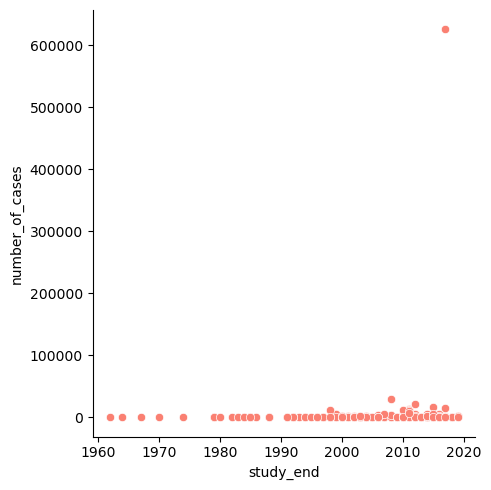

In [8]:
sns.relplot(data = df , x = 'study_end', y = 'number_of_cases', color = 'salmon')

This graph depicts a fairly straight line - near 0 - with one major outlier. This outlier may have been in error. Studies have concluded with major errors before.
Does this mean that the rates of autism have stayed fairly consistent throughout time?

Just in case, let's look more closely at this outlier. Maybe there's something we're missing.

In [9]:
df.query('number_of_cases >= 300000')

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end
197,"Safer-Lichtenstein, et al.",School-Based Autism Rates by State: An Analysi...,2020,USA,Nationwide,6 to 21,"2015, 2016, 2017",other (government education data),special education classification,50693053.0,625215.0,12.3,12.30- 12.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://pubmed.ncbi.nlm.nih.gov/32926306/,CI,2015,2017


This outlier from the start seems to be a pretty wide study. The title alone refrences "by State", which indicates to me that this is analyzing a whole country, as the area_s_ column confirms, the age range is broad, "6 to 21", the study is over three separate years, and the sample size is **50693053.0**. That is a *very* big number. I think that explains the large number of autism cases the study found.

Let's try plotting the sample size over time - the number of cases will also be shown through the size and color of the dots.

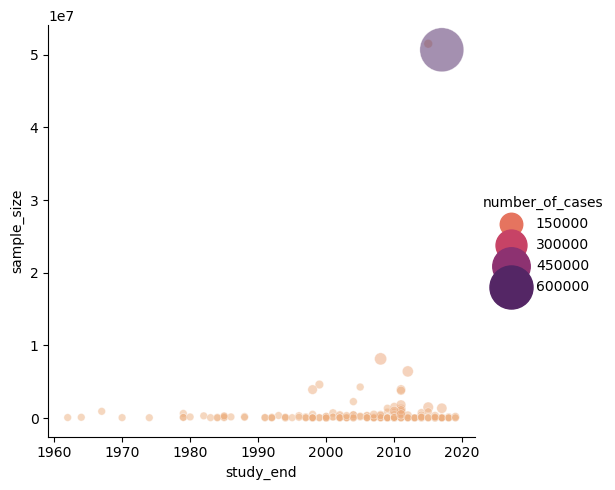

In [10]:
sns.relplot(data = df, x = 'study_end', y = 'sample_size', size = 'number_of_cases', sizes = (30, 1000), alpha = .5, hue = 'number_of_cases', palette = "flare")

There appears to be *another* study, who took a similar sample size, but found many many less cases!

In [11]:
df.query('sample_size >= 30000000')

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end
188,"Hong, et al.",Prevalence and economic burden of autism spect...,2020,South Korea,Nationwide,-1,2015,other (government administrative data),ICD-10,51529338.0,5663.0,0.11,0.107 - 0.112,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://pubmed.ncbi.nlm.nih.gov/31630294/,CI,2015,2015
197,"Safer-Lichtenstein, et al.",School-Based Autism Rates by State: An Analysi...,2020,USA,Nationwide,6 to 21,"2015, 2016, 2017",other (government education data),special education classification,50693053.0,625215.0,12.30,12.30- 12.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://pubmed.ncbi.nlm.nih.gov/32926306/,CI,2015,2017


This was also a Nationwide study, but they differ in almost every aspect aside from that - this new study took place in South Korea, has an unspecified age range, used an ICD-10 tag, instead of a special education classification. Looking at the original datasheet you can read the full title which mentions this data was taken from health insurance data, instead of education data. There's no telling what difference, recorded or non-recorded, may be creating this difference in case count - per - sample size difference (or autism prevalence in the sampled population).

Let's look at the first number of cases versus time, but now with this autism prevalance represented in the size and color of the dots.

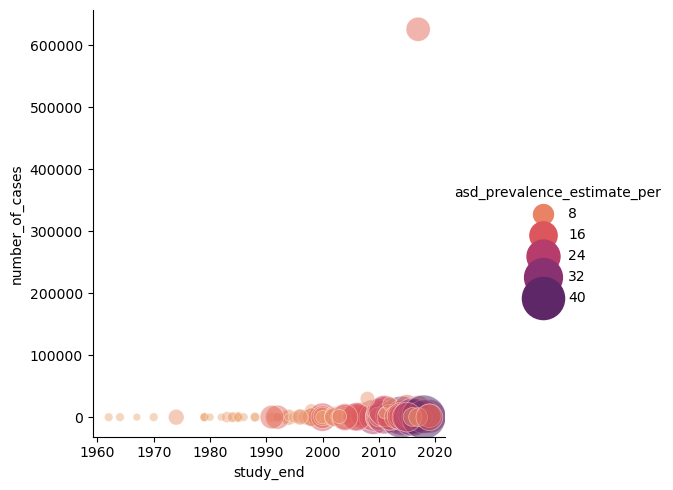

In [12]:
sns.relplot(data = df , x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

We get the same line, but surprisingly, we see most of the high autism prevalances in that bottom part of the graph, away from the outliers. Let's disregard those outliers for now, and look closer at that cluster by taking away the studies with a sample size of over 30,000,000.

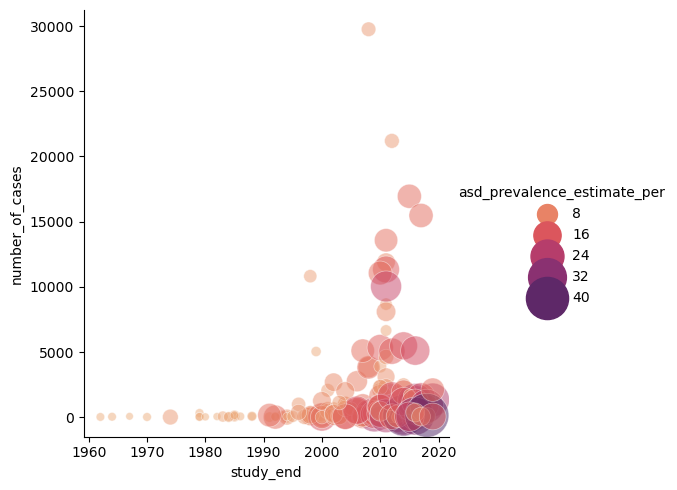

In [13]:
sns.relplot(data = df [-(df.sample_size >= 30000000)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

Under 30,000,000 participants sampled, we see a large spike in cases between 2000 and 2020 - highest just around 2010. Coincidentally, this is directly in the middle of the cluster of studies. There are still a lot of studies overlapping, though. Let's zoom in again. What about studies who sample under 300,000?

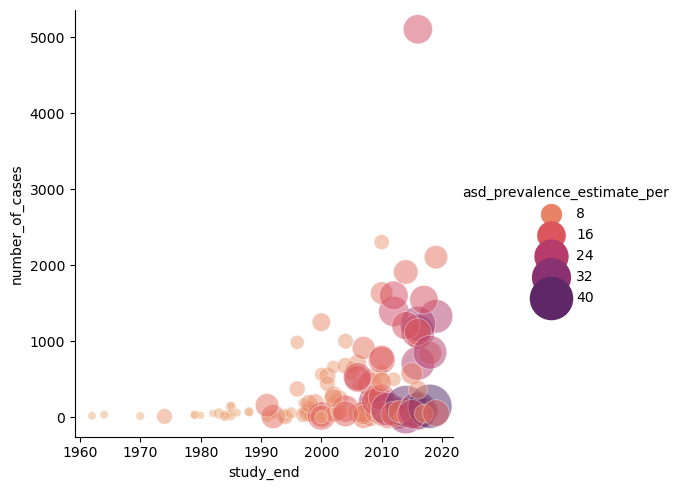

In [14]:
sns.relplot(data = df [-(df.sample_size >= 300000)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

Now we're seeing a gentle increase in cases from 1990 to 2020. But these high-prevalance studies are still illuding us near the bottom of the graph, too near 0 to discern.

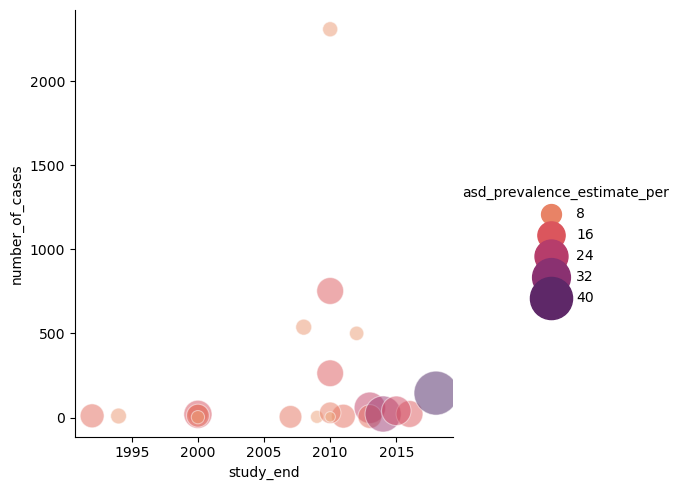

In [15]:
sns.relplot(data = df [-(df.sample_size >= 3400)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

Sampling under 3,400 people we see a spike again, around 2010. This is around the range of the last study with an autism prevalance of 40 per 1,000 or 4/100 or 4% of the projected population. Some of the studies still illude us, being near 0 on the charts, but they do not have the highest prevalance estimates, nor do they have convincing confidince intervals. This is common for studies with a small sample size.

*(FYI - a large difference between the results in a confidence interval means the results cannot be trusted with as much certianty. For instance, a confidince interval of 1.001 - 1.002 is excellent, but you shouldn't bet your life on a confidence interval of 1.001 - 45.697. Sincerly, statistics class.)*

Take note of the confidence intervals of those studies sampling under 3,000:

In [16]:
df.query('sample_size <= 3000')

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end
24,"Arvidsson, et al.",Autism in 3-6 year-old children in a suburb of...,1997,Sweden,Mölnlycke,3 to 6,1994,health records,ICD-10; autism test (ADI-R); clinician interpr...,1941.0,9.0,4.60,2.44 - 8.79,3.5,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,22.2 (epilepsy); 11.1 (down syndrome),"childhood autism, early infantile autism, auti...",https://jourls.sagepub.com/doi/pdf/10.1177/136...,IQ Score <70 (%); percent co-occuring conditions,1994,1994
27,"Kadesjö, et al.",Brief report: autism and asperger syndrome in ...,1999,Sweden,Karlstad,6.7 to 7.7,1992,survey (mail),DSM-III-R; ICD-10; autism test (ADI-R),826.0,10.0,12.10,5.8 - 22.5,9.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,10 (down syndrome),"autistic disorder, Asperger syndrome, other au...",https://www.ncbi.nlm.nih.gov/pubmed/10478732,IQ Score <70 (%); percent co-occuring conditions,1992,1992
46,"Tebruegge, et al.",Does routine health surveillance contribute to...,2004,England,Kent,8 to 9,2000,education records; health records,ICD-10,2536.0,21.0,8.28,5.42 - 12.63,6.0,NaN,NaN,33-113,60.0,53,NaN,NaN,NaN,23.8 (ADHD); 9.5 (epilepsy),"PDD (childhood autism, Asperger's syndrome, an...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"diagnosis age range, mean age, median age (yea...",2000,2000
51,"Jané, et al.",Parents and teachers reports of DSM-IV psychop...,2005,Spain,Catalonia,3 to 6,NaN,survey (in-person),DSM-IV,1104.0,19.0,17.20,11.04 - 26.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autistic disorder; Asperger syndrome,https://pubmed.ncbi.nlm.nih.gov/16520884/,prevalence estimate; CI,2000,2000
59,"Petersen, et al.",The population prevalence of child psychiatric...,2006,Denmark,County of Funen,8 to 9,2000,survey (mail),DSM-IV; clinical interpretation,690.0,11.0,11.00,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PDD (autistic disorder, Asperger syndrome)",https://pubmed.ncbi.nlm.nih.gov/16477477/,sample size; number of cases,2000,2000
68,"Eapen, et al.",Prevalence of pervasive developmental disorder...,2007,United Arab Emirates,Dubai; Al Ain in Abu Dhabi Emirate; Ras Al-Kha...,3,NaN,survey (unspecified),DSM-IV,694.0,2.0,2.90,0.0 - 7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDD,https://www.ncbi.nlm.nih.gov/pubmed/17244665,none,2000,2000
81,"Perera, et al,",Screening of 18-24-month-old children for auti...,2009,Sri Lanka,A semi-urban community,1.5 to 2,2007,survey (in-person),DSM-IV; clinical interpretation,374.0,4.0,10.70,4.17 - 27.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (unspecified),https://pubmed.ncbi.nlm.nih.gov/19401407/,CI,2007,2007
95,"Paula, et al.",Brief report: prevalence of pervasive developm...,2011,Brazil,Atibaia,7 to 12,NaN,health records; education records,"autism test (K-SADS, ADI-R); clinical interpre...",1470.0,4.0,2.72,1.76 - 3.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PDD (autistic disorder, childhood disintegrati...",https://www.ncbi.nlm.nih.gov/pubmed/21337063,none,2005,2009
121,"Kakooza-Mwesige, et al.","Adaptation of the ""ten questions"" to screen fo...",2014,Uganda,Kampala District; Wakiso District,2 to 9,2010-2011,survey (in-person),DSM-IV-TR,1169.0,8.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pubmed/23536263,none,2010,2011
133,"Pelly, et al.",Incidence and cohort prevalence for autism spe...,2015,Canada,Newfoundland; Labrador,4,2013,health records,DSM-IV-TR; clinical interpretation,2668.0,58.0,21.60,16.85 - 28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ASD (

Now, what commonalities are there in studies with high prevalances of autism in their populations?

In [17]:
df.query('asd_prevalence_estimate_per > 24')

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end
20,"Yuan, et al.",Racial/ethnic disparities in the prevalence an...,2021,USA,Nationwide,3 to 17,2014-2019,survey (in-person; phone),parental report,52550.0,1330.0,24.9,22.9 - 26.8,3.5,1.40,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,none,2014,2019
94,"Kim, et al.",Prevalence of autism spectrum disorders in tot...,2011,South Korea,Ilsan district of Goyang City,7 to 12,2005-2009,survey (unspecified),"DSM-IV; autism test (ADOS, ADI-R); clinical in...",55266.0,201.0,26.4,19.1 - 33.7,3.4,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,"ASD (PDD, autistic disorder, Asperger syndrome...",https://www.ncbi.nlm.nih.gov/pubmed/21558103,sex ratio; IQ Score <70 (%),2005,2009
145,"Chiwa, et al.",Prevalence and socioeconomic correlates of aut...,2016,Nigeria,Enugu; Ebonyi,3 to 18,2014,survey (in-person),DSM-IV-TR,721.0,21.0,29.0,19.12 - 44.12,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,CI,2014,2014
147,"Randall, et al.",Autism spectrum disorder: Presentation and pre...,2016,Australia,Nationwide,6 to 7,2010-2011,other (parent interview as part of on-going co...,parental report,4239.0,107.0,25.0,20.0 - 30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"autism, Asperger syndrome, other autism spectrum",https://www.ncbi.nlm.nih.gov/pubmed/26282446,none,2010,2011
151,"May, et al.",Autism spectrum disorder: Updated prevalence a...,2017,Australia,Nationwide,10 to 11,2014,other (parent interview as part of on-going co...,parental report,3764.0,145.0,39.0,32.0 - 45.0,NaN,NaN,NaN,NaN,67.40,NaN,NaN,NaN,NaN,NaN,"ASD (autism, Asperger syndrome, other autism s...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,none,2014,2014
158,"Zablotsky, et al.",Estimated Prevalence of Children With Diagnose...,2017,USA,Nationwide,3 to 17,2014-2016,survey (in-person),parental report,NaN,NaN,24.7,22.3 - 27.2,NaN,1.52,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://pubmed.ncbi.nlm.nih.gov/29235982/,none,2014,2016
159,"Kogan, et al.",The prevalence of parent-reported autism spect...,2018,USA,Nationwide,3 to 17,2016,"survey (online, mail)",parental report,43021.0,1131.0,25.0,22.3 - 28.1,4.2,1.10,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (autism),https://www.ncbi.nlm.nih.gov/pubmed/30478241,White:Hispanic and White:black prevalence ratio,2016,2016
163,"Xu, et al.",Prevalence of autism spectrum disorder among c...,2018,USA,Nationwide,3 to 17,2014-2016,"survey (in-person, phone)",parental report,30502.0,711.0,24.7,22.0 - 27.3,3.3,1.50,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,none,2014,2016
174,"Xu, et al.",The prevalence and treatment patterns of autis...,2019,USA,Nationwide,3 to 17,2016,survey (online),parental report,43031.0,1229.0,27.9,24.6 - 31.2,4.3,1.10,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://pubmed.ncbi.nlm.nih.gov/30508021/,none,2016,2016
189,"Saito, et al.",Prevalence and cumulative incidence of autism ...,2020,Japan,Hirosaki,5,2013-2016,survey (mail),clinical interpretation; DSM-5,5016.0,87.0,32.2,26.6 - 3.76,2.2,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,50.57 (ADHD),ASD (not specified),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,none,2013,2016


I'm seeing a lot of parental reports listed as the case criterion for studies here. Maybe we can look at case criterion and how that affects the prevalance of autism?

*(FYI - case criterion are the grounds under what a "case of autism" is notified by, for the purposes of that case criterion's specific study.)*

Since I further need to clean up my dataset so that it can produce readable graphs of this column through seaborn; let's make our own bins and look at how parental reports versus other types of criterion stack up. Just those two, for our first visulization.

In [18]:
#parental report Y/N?
for idx, row in df.iterrows():
    if "parent" in str(row['case_criterion']):
        simple_criterion = 'parental_report'
    else:
        simple_criterion = 'other'

    df.at[idx, 'simple_criterion'] = simple_criterion

Here are all the criterion now listed as parental_report:

In [19]:
df[df['simple_criterion'].str.contains("parental_report")]

,author,title,year_published,country,area_s_,age_range,study_years,case_identification_method,case_criterion,sample_size,number_of_cases,asd_prevalence_estimate_per,confidence_intervalci_,male_female_sex_ratio,non_hispanic_white_hispanic_prevalence_ratio,white_black_prevalence_ratio,diagnosis_age_rangemonths_,diagnosis_mean_agemonths_,diagnosis_median_agemonths_,iq_score,adaptive_score,non_verbal_or_minimally_verbal,percentage_of_individual_co_occurring_conditions,autism_types_included,link_to_publication,cdc_calculated_values,study_start,study_end,simple_criterion
20,"Yuan, et al.",Racial/ethnic disparities in the prevalence an...,2021,USA,Nationwide,3 to 17,2014-2019,survey (in-person; phone),parental report,52550.0,1330.0,24.90,22.9 - 26.8,3.5,1.40,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,none,2014,2019,parental_report
29,"Halfon, et al.",Prevalence and impact of parent-reported disab...,1999,USA,Nationwide,0 to 17,1992-1994,survey (in-person),parental report; ICD-9,99513.0,46.0,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,infantile autism,https://pubmed.ncbi.nlm.nih.gov/10230193/,CI,1992,1994,parental_report
54,"Blanchard, et al.","Emotional, developmental, and behavioral healt...",2006,USA,Nationwide,0 to 17,2003,survey (phone),parental report,102353.0,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autism,https://pubmed.ncbi.nlm.nih.gov/16740820/,none,2003,2003,parental_report
82,"Kogan, et al.",Prevalence of parent-reported diagnosis of aut...,2009,USA,Nationwide,3 to 17,2007,survey (phone),parental report,77911.0,913.0,11.00,9.4 - 12.8,4.2,1.20,2.00,NaN,NaN,NaN,NaN,NaN,NaN,32.75 (ADD/ADHD); 30.56 (anxiety); 12.16 (depr...,"ASD (autism, Asperger syndrome, PDD, other ASD)",https://www.ncbi.nlm.nih.gov/pubmed/19805460,percent co-occurring conditions,2007,2007,parental_report
88,"Boyle, et al.",Trends in the prevalence of developmental disa...,2011,USA,Nationwide,3 to 17,1997-2008,other (government administraive data),parental report,NaN,537.0,4.70,NaN,3.9,1.63,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,autism (not specified),https://pubmed.ncbi.nlm.nih.gov/21606152/,sex ratio; non-hispanic white:hispanic and whi...,1997,2008,parental_report
116,"Blumberg, et al.",Changes in prevalence of parent-reported autis...,2013,USA,Nationwide,6 to 17,2011-2012,survey (phone),parental report,65556.0,1393.0,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (not specified),https://www.ncbi.nlm.nih.gov/pubmed/24988818,none,2011,2012,parental_report
122,"Russell, et al.",Prevalence of parent-reported ASD and ADHD in ...,2014,United Kindgom,England; Scotland; Wales; Northern Ireland,7,2008-2009,survey (unspecified),parental report,14043.0,209.0,17.00,14.0 - 20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9 (ADHD),"ASD (autism spectrum disorder, autistic disord...",https://pubmed.ncbi.nlm.nih.gov/23719853/#:~:t...,none,2008,2009,parental_report
125,"Zablotsky, et al.",Estimated prevalence of autism and other devel...,2015,USA,Nationwide,3 to 17,2014,"survey (in-person, phone)",parental report,13000.0,NaN,22.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASD (autism),https://www.ncbi.nlm.nih.gov/pubmed/26632847,none,2014,2014,parental_report
147,"Randall, et al.",Autism spectrum disorder: Presentation and pre...,2016,Australia,Nationwide,6 to 7,2010-2011,other (parent interview as part of on-going co...,parental report,4239.0,107.0,25.00,20.0 - 30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"autism, Asperger syndrome, other autism spectrum",https://www.ncbi.nlm.nih.gov/pubmed/26282446,none,2010,2011,parental_report
151,"May, et al.",Autism spectrum disorder: Updated prevalence a...,2017,Australia,Nationwide,10 to 11,2014,other (parent interview as part of on-going co...,parental report,3764.0,145.0,39.00,32.0 - 45.0,NaN,NaN,NaN,NaN,67.40,NaN,NaN,NaN,NaN,NaN,"ASD (autism, Asperger syndrome, other autism s...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,none,2014,2014,parental_r

Parental reports often being paired with a survey, instead of an offical diagnosis from the DSM or ICD often. I wonder why?

Let's see how the prevalances of autism in a parental report stack up to other types of case criterion, first.

<AxesSubplot:xlabel='asd_prevalence_estimate_per', ylabel='simple_criterion'>

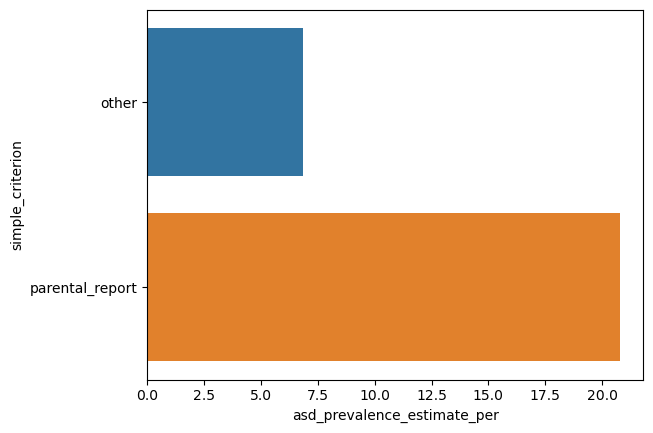

In [20]:
sns.barplot(data = df, x = 'asd_prevalence_estimate_per', y = 'simple_criterion', ci = None)

The parental reports seem to drastically outpace the other types of criterion when it comes to prevalance estimates. Maybe there's some categories that are dragging all of the others down. To find out let's sort the criterion more explictly.

In [21]:
#bin for each case criterion
for idx, row in df.iterrows():
    if "parent" in str(row['case_criterion']):
        simple_criterion = 'parental_report'
    elif "survey" in str(row['case_criterion']):
        simple_criterion = "survey"
    elif "autism test" in str(row['case_criterion']):
        simple_criterion = "autism_test"
    elif "education classification" in str(row['case_criterion']):
        simple_criterion = "education classification"
    elif "receipt" in str(row['case_criterion']):
        simple_criterion = "receipt"
    elif "Kanner" in str(row['case_criterion']):
        simple_criterion = 'Kanner'
    elif "clinical interpretation" in str(row['case_criterion']):
        simple_criterion = 'clinical interpretation'
    elif "ICD" in str(row['case_criterion']):
        simple_criterion = 'ICD'
    elif "DSM" in str(row['case_criterion']):
        simple_criterion = 'DSM'
    else:
        simple_criterion = 'other'

    df.at[idx, 'simple_criterion'] = simple_criterion

<AxesSubplot:xlabel='asd_prevalence_estimate_per', ylabel='simple_criterion'>

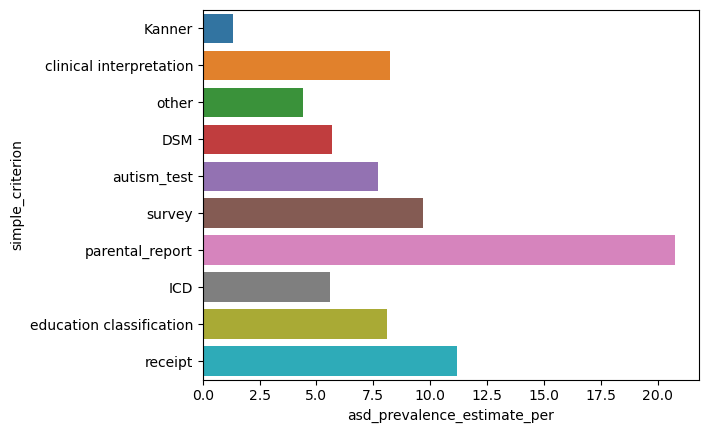

In [22]:
sns.barplot(data = df, x = 'asd_prevalence_estimate_per', y = 'simple_criterion', ci = None)

The parental reports still drastically outpace every single other type of criterion when it comes to prevalance estimates, about by half. I wonder why? Do parents think their children are autistic when they aren't? Is healthcare failing these families and not giving the children the diagnosies they need? I'm left with more questions than answers.

But, I'm also left not only with curiosity. Now, I have tools to find answers, and the skills to use them (to some extent). Maybe the answers only lead to more questions, maybe many uses of the tools I now know about are outside of my skill's grasp, maybe there are many, many tools yet that I do not know, or cannot even concept - but small steps forward are how we are able to accomplish leaps. Just the smallest bit of new information, new skills, new ideas open the doors to new possibilities.

Furthermore, I've found it within myself to face the shame put upon me by society's quabbles and look at my past critically. And this way, I can begin forging forward to find more glimpses of the truth.

What will you do about your past? 

# Works Cited:

CDC Info. “Autism Prevalence Studies.” Data.gov Data Catalog, Publisher Centers for Disease Control and Prevention, 10 Nov. 2020, https://catalog.data.gov/dataset/autism-prevalence-studies. 

The dataset used in this project. This data is a collection of results from autism prevalence studies ranging from 1960 to about 2020. The data includes the number of people assessed, as well as the number of people who were reported as autistic for that study, among many other metrics, a few of which I explore in this data story.

# Special Thanks: #

Dr. Dmitriy Babichenko - dataset location, programming direction and assistance

Dr. Jessica FitzPatrick - Narrative suggestions and feedback

Eric Hibbs - feedback

Noah Howells - feedback

Radley Lettich - feedback

# Reflection: #

##### *Describe the data set you finally chose, and why:*  
I chose "Autism Prevalence Studies'' from the Data.gov Data catalog because it was the largest spanning collection of data I could find. Importantly, it had the prevalence of autism over a large span of time, starting from the year 1960, globally (instead of being region-locked). Additional pulses include the inclusion of many other points of data like the confidence intervals, and case criterion.


##### *Explain how you brought your contextual research and considerations of potential harm into your design*   
Because of the sensitive nature of this topic - which I know from lived experience - I was cautious in how I wrote my narrative around it. There are many instances of people claiming to have medical knowledge when they in fact do not, and kids end up getting hurt or killed from the information disseminated. For instance, take the advice to pour bleach down your child's throat to cure their autism: https://www.nbcnews.com/tech/internet/moms-go-undercover-fight-fake-autism-cures-private-facebook-groups-n1007871. Some of these statistics from this dataset have hurt me personally, I'm sure of it. So when telling my data story I did my best to make it clear I am just telling the audience about my exploration into this dataset, and do not know what it means for myself, let alone anyone else. The narrative call I attempt to make is only for the audience to try researching more into a topic they hold dear themselves.

##### *Outline how and why your story / question changed from the start of this process.*  
At the start of this process, I wanted to have a more broad view of the change in autism over time, as well as explain the changes in diagnosis criteria over time, positing that may be a reason the rates in autism diagnosis have increased. I did quite a bit of research for this, but ultimately wrangling my dataset took much longer than I anticipated, and I ran out of time to further research and section each diagnosis into a criteria. Furthermore, there are so many ways these studies identify individuals with autism, that I would be severely limiting my data by only focusing on the entries with DSM or even ICD. Positing that the change of diagnosis criteria is the main factor of change in autism rates is potentially harmful, as well.

##### *In the next section, briefly describe any transformations of the dataset that you needed to perform to get the data into the format needed for your visualization.*  
Largely, my dataset needed to be formatted in a more consistent manner for seaborn to be able to understand it. The fields had too much information, and Dmitriy and I needed to separate that information out into separate columns, or simplify it so it could be used.

##### *Write a few paragraphs at the end of your Jupyter Notebook or HTML file further explaining why you chose your particular visualization approach. Be sure to provide examples / specific details to support any claims you make. (This is where you should paste “failed attempts” and gesture to why you changed tactics; this is also where you address workshop feedback.)*  
See Bloopers section.

##### *How did your design decisions work for your test audience / classmate user feedback, and how did they fall short?*    
I decided to wrangle the visualizations first, to the ignorance of my written narrative because I wanted to see what I could visualize and construct my narrative around what I could create with my programming. Because of this, the feedback I received was to write more "story" into my "data story" - which I already planned to do; but on the bright side I got a plethora of great suggestions on how to go forth with the narrative which were useful when starting on it.

##### *Where might you revise in another round of iteration to better evidence your data’s story?*     
I feel like I have only just begun to grasp this dataset. If I had another round, I would look more into breakdown of prevalence by country, do some research to social pressures on autistic individuals in countries globally; I would do research into case criterion and how parental reports function; I would do research into individual studies that showcase high autism prevalence, and attempt to find connections. I would try to sort the data by specific iterations of medical classifications like DSM-1, DSM-2 etc., ICD-10, ICD-11, etc. I would also make all the visualizations very pretty - color code everything, probably end up changing the font and trying to add animations to it.

##### *Are there any stories your current work occludes, marginalizes, or minimizes? How might an alternative direction of this work include or highlight those stories?*  
Yes, this current work occludes the process of generating a study such as this, as well as the process of researching autism prevalence data professionally, this work occludes the beginnings of autism research; there are infinite stories this data story does not tell. One alternate version of this work may have had more research into the process of generating a study such as this, and would be better at communicating the work of researchers, both on and off the field. Maybe I could've interviewed scientists in the field. My work does not go into the intricacies of how this vague "shame" could hurt people like me - in another world I could've written some graphic depictions of autistic individuals being abused through the ages because of misinformation.


# Bloopers:

Oh Lord there are so many -

1) looks like clown barf:

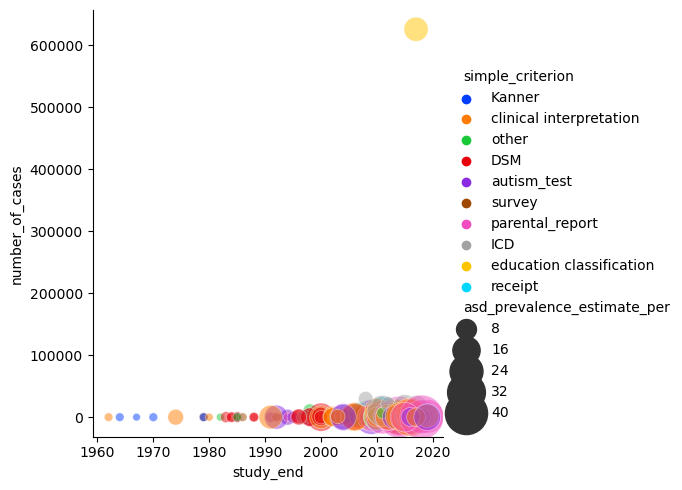

In [23]:
sns.relplot(data = df , x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'simple_criterion', palette = "bright")

2) pretty, but cluttered:

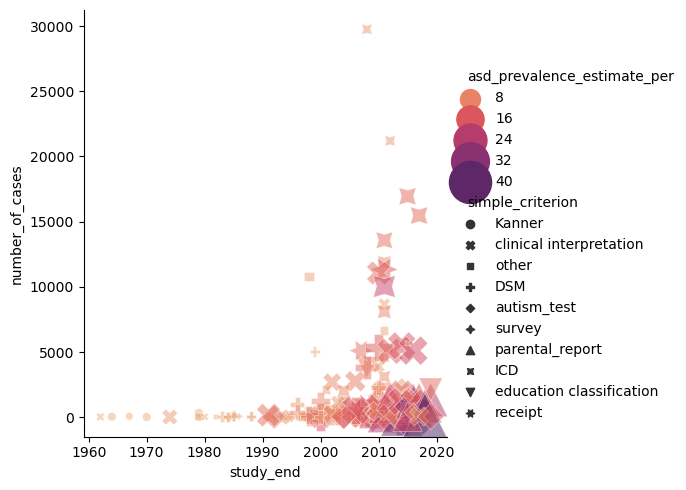

In [24]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), style = "simple_criterion", alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

3) pretty once again, but at this scale it is now very useful. It blows differences out or proportion and did not fit into the final draft of the narrative:

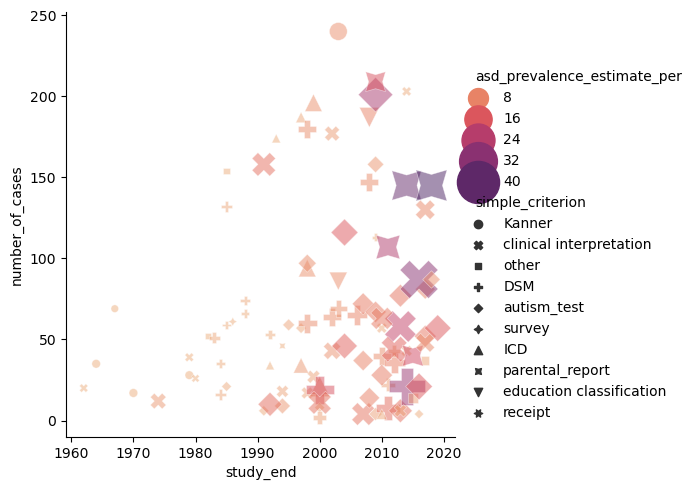

In [25]:
sns.relplot(data = df [-(df.number_of_cases >= 250)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), style = "simple_criterion", alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

4) looks very pixel-y hard for the eye to immediately make sense of and written description wouldn't have helped much. I wanted to find a way to filter out to show the graph with only Kanner, or DSM, for instance, so audiences could understand, but I ran out of time and still do not know how to do that:

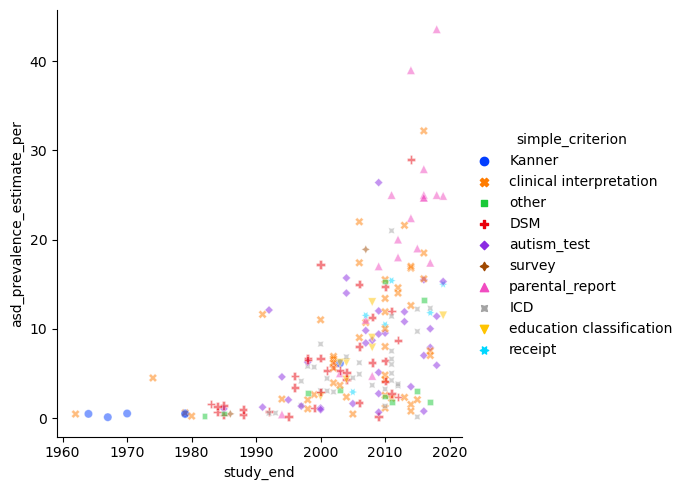

In [26]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'asd_prevalence_estimate_per', alpha = .5, hue = 'simple_criterion', palette = "bright", style = "simple_criterion")

5) IQ score did not end up fitting into the final draft of the narritive. Also, all the previous things I mentioned before about being indecipherable:

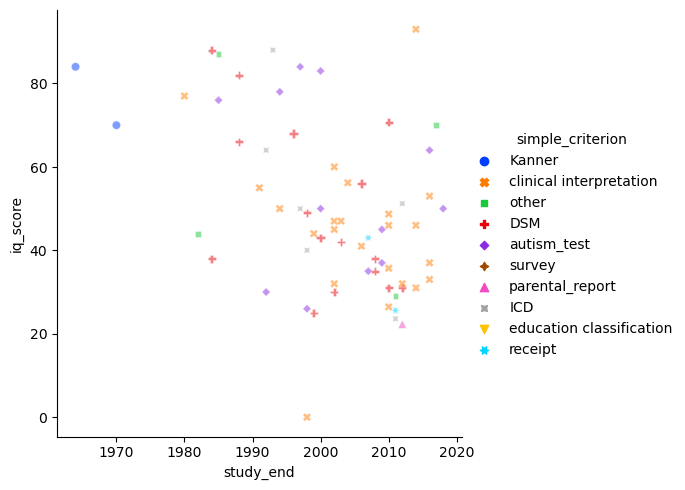

In [27]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'iq_score', alpha = .5, hue = 'simple_criterion', palette = "bright", style = "simple_criterion")

6) same as 5 but now with sex ratio:

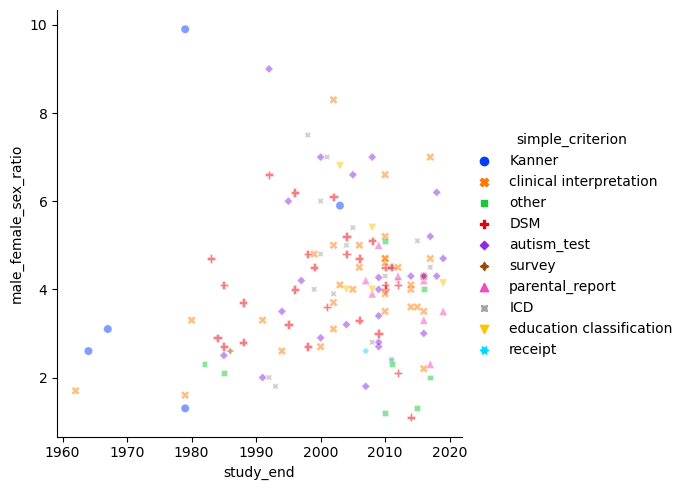

In [28]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'male_female_sex_ratio', alpha = .5, hue = 'simple_criterion', palette = "bright", style = "simple_criterion")

7) same as 6, but now with levels of being verbal. Also, this looks like a toddler scribbled on the wall with crayon (totally me when I was younger :'D):

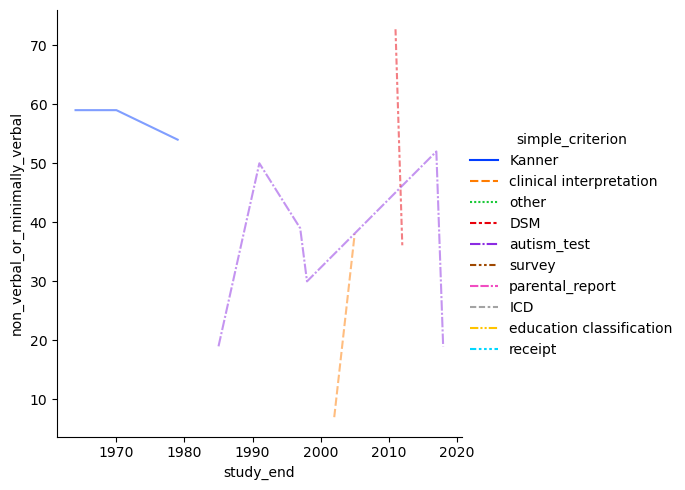

In [29]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'non_verbal_or_minimally_verbal', alpha = .5, hue = 'simple_criterion', palette = "bright", style = "simple_criterion", kind = "line")

8) a cleaner version of this graph. Still not sufficent, no clear connection in the data:

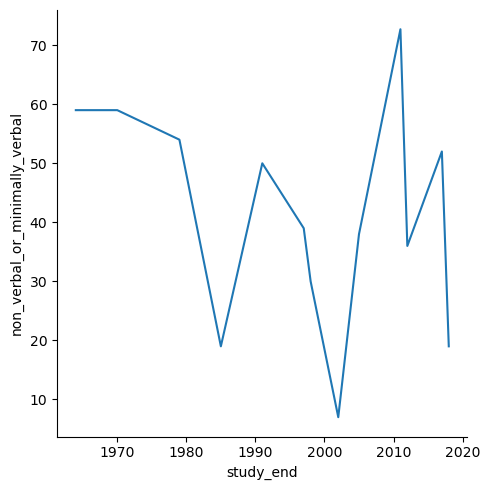

In [30]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'non_verbal_or_minimally_verbal', kind = "line")

9) did not fit into final narrative:

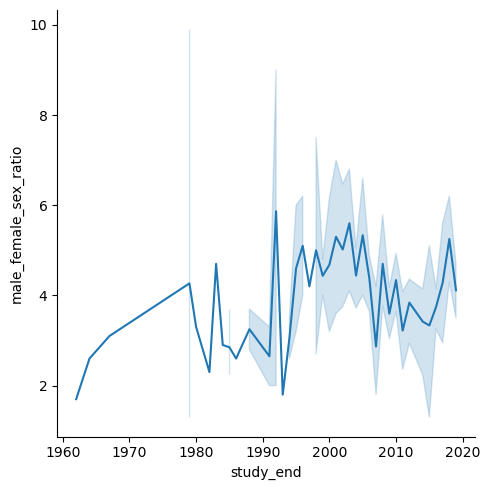

In [31]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'male_female_sex_ratio', kind = "line")

10) probably the best candidate to have been included in the data story. I feel that the other visulizations were able to communicate the same information, though, and more:

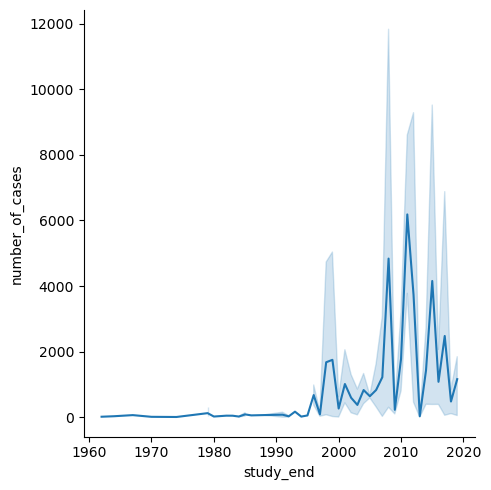

In [32]:
sns.relplot(data = df [-(df.number_of_cases == 625215)], x = 'study_end', y = 'number_of_cases', kind = "line")

11) no clear pattern in data:

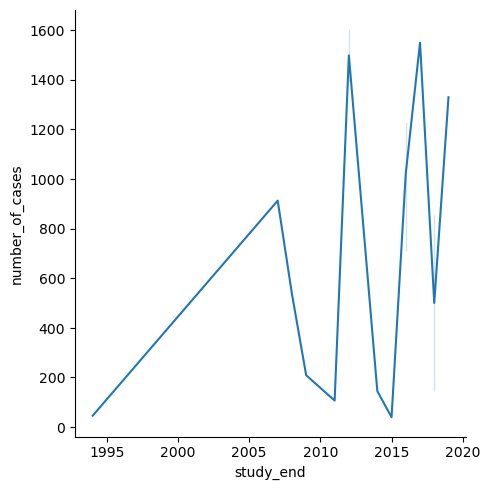

In [33]:
sns.relplot(data = df [-(df.simple_criterion != "parental_report")], x = 'study_end', y = 'number_of_cases', kind = "line")

12) one of my favorites. How did I even do this? It looks like a mad scribble:

<AxesSubplot:xlabel='study_end'>

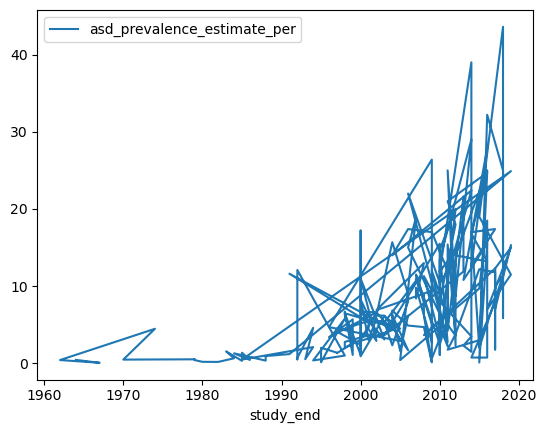

In [34]:
df[['asd_prevalence_estimate_per','study_end']].query('study_end >= 1960').plot.line(x='study_end',y='asd_prevalence_estimate_per')

13) hehe looks like a triangle. Zooming in this much makes the data loose meaning in my mind:

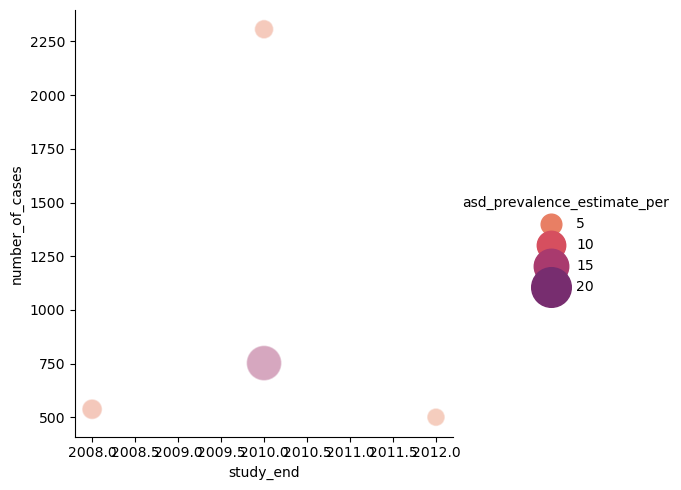

In [35]:
sns.relplot(data = df [-(df.sample_size >= 250)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .44, hue = 'asd_prevalence_estimate_per', palette = "flare")

14) another of my favorites, the rainbow combined with the overlapping text is beautiful:

<AxesSubplot:xlabel='asd_prevalence_estimate_per', ylabel='case_criterion'>

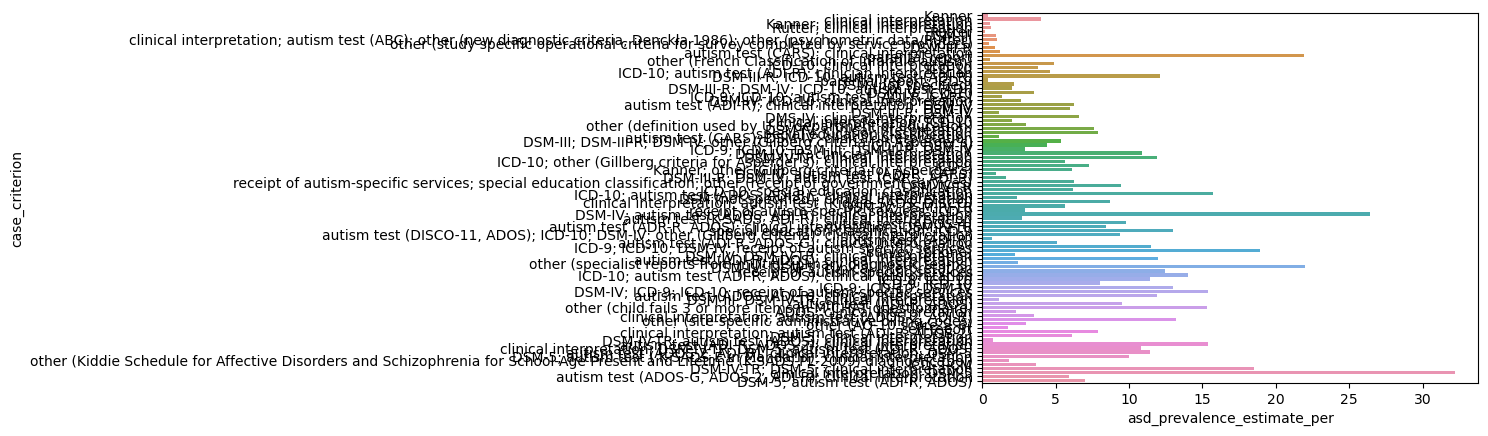

In [36]:
sns.barplot(data = df, x = 'asd_prevalence_estimate_per', y = 'case_criterion', ci = None)

15) suite of visulizations used in demonstrated rough draft of my data story. I realized sorting by number of cases when I was really trying to file down by study size made no sense:

15a):

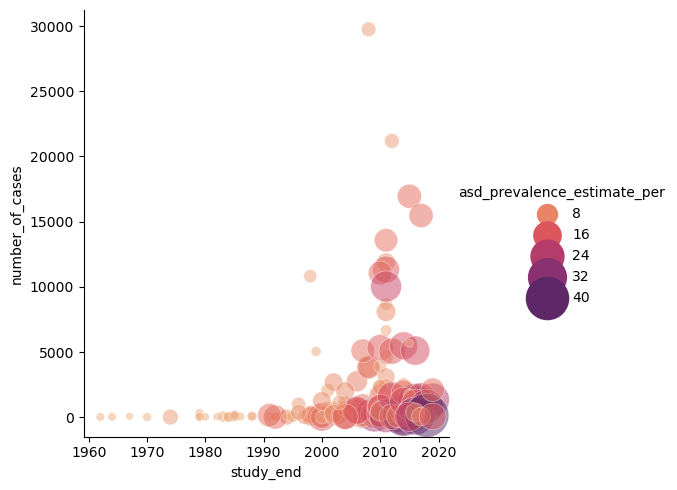

In [38]:
sns.relplot(data = df [-(df.number_of_cases == 625215.0)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

15b):

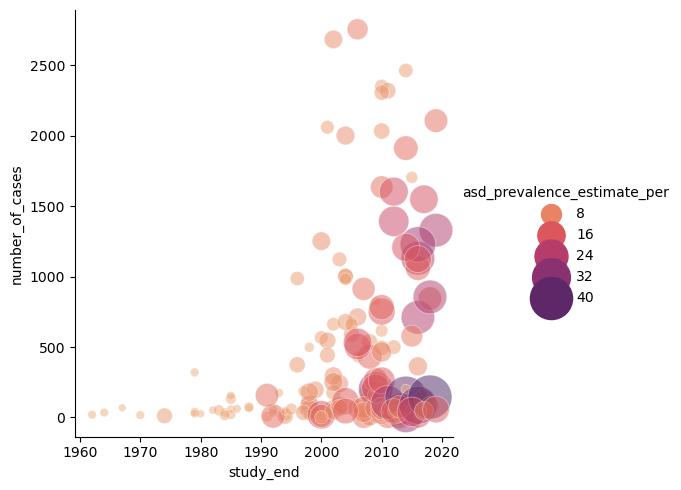

In [39]:
sns.relplot(data = df [-(df.number_of_cases >= 3000.0)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .5, hue = 'asd_prevalence_estimate_per', palette = "flare")

16) zooming into this scale makes the data loose meaning, in my mind:

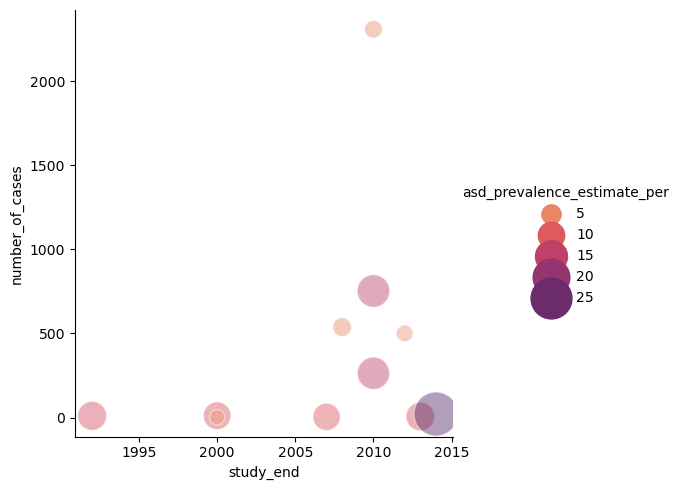

In [41]:
sns.relplot(data = df [-(df.sample_size >= 1000)], x = 'study_end', y = 'number_of_cases', size = 'asd_prevalence_estimate_per', sizes = (30, 1000), alpha = .44, hue = 'asd_prevalence_estimate_per', palette = "flare")

17) could not make sense of this:

<AxesSubplot:xlabel='asd_prevalence_estimate_per', ylabel='number_of_cases'>

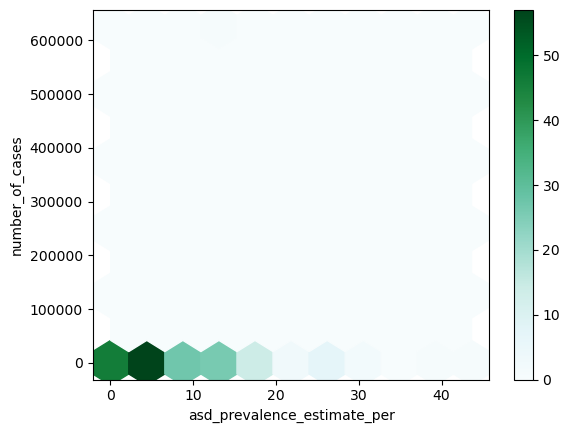

In [42]:
df.plot.hexbin(x='asd_prevalence_estimate_per', y='number_of_cases', gridsize=10)

18) ran out of time to separate out the text. Also, I think some of the countries might be duplicated and this did not fit into my final narrative:

<AxesSubplot:xlabel='asd_prevalence_estimate_per', ylabel='country'>

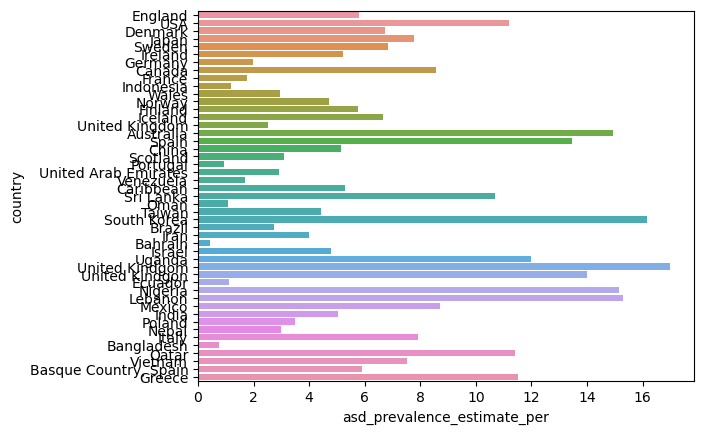

In [43]:
sns.barplot(data = df, x = 'asd_prevalence_estimate_per', y = 'country', ci = None)

19) another of my favorites. Makes 0 sense:

<AxesSubplot:>

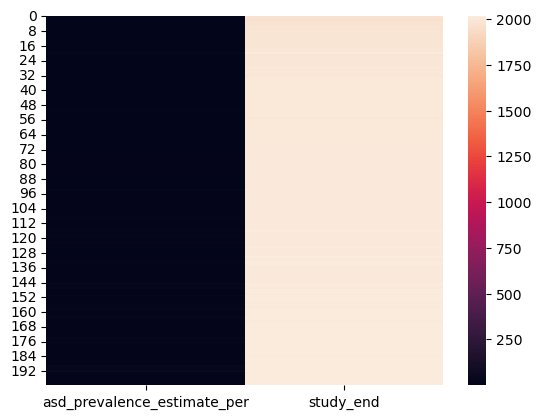

In [44]:
sns.heatmap(df[['asd_prevalence_estimate_per','study_end']])

20) this definitely makes some sense, but I can't decipher it. Pretty though, I'd buy a blanket like this:

<AxesSubplot:>

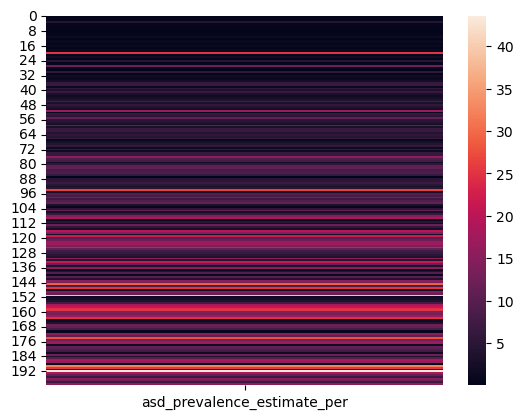

In [45]:
sns.heatmap(data=df.query('study_end >= 1960')[['asd_prevalence_estimate_per']])

21) this one is what my outlook on this project felt like at the time haha:

<AxesSubplot:>

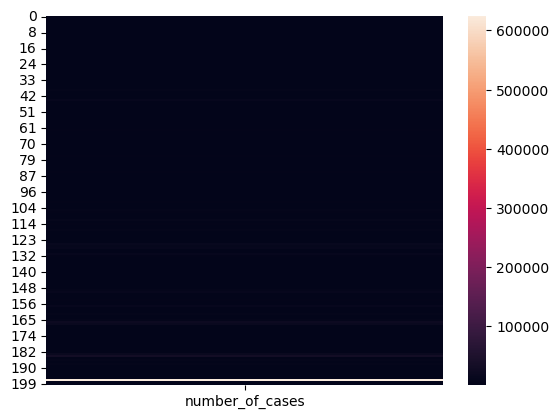

In [46]:
sns.heatmap(data=df.query('number_of_cases > 0 | number_of_cases < 15000')[['number_of_cases']])

22) I find this one espically funny because it looks like there's no data at all:

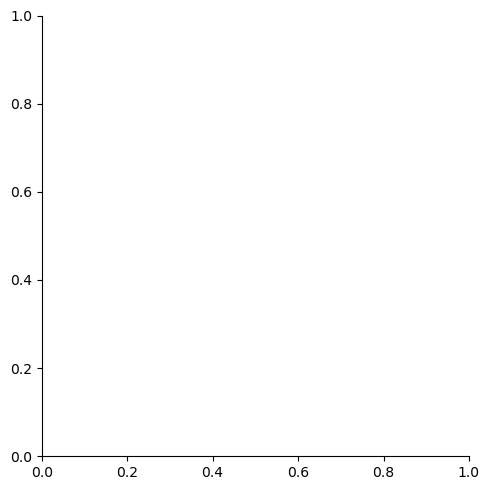

In [47]:
sns.relplot(data = df [-(df.simple_criterion != "clinical intrepretation")], x = 'study_end', y = 'number_of_cases', kind = "line")

Onto the next project :)